In [1]:
%pip install pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


# 載入與探索資料 (使用 Pandas 與 scikit-learn)
* 我們常用 Pandas DataFrame 來處理結構化的資料

* 載入 CSV 檔案： 使用 pd.read_csv()

* 載入 scikit-learn 內建資料集： scikit-learn 提供了一些範例資料集 (如波士頓房價資料集)，這些資料集載入後通常是 dictionary 格式

* 可以透過 `.keys()` 查看包含哪些內容 (如 data, target, feature_names, description)
* 需要將其轉換為 DataFrame 格式以便操作

In [2]:
# 載入必要的套件、從 scikit-learn 套件中匯入 fetch_openml函式來從 OpenML 平台（一個公開的資料集儲存庫）下載各種資料集。
# name='boston'：指定要下載的資料集名稱。version=1：指定版本號。
# as_frame=True：預設值為False True讓輸出的資料以 pandas DataFrame 格式呈現；False則是傳回 numpy 陣列
# fetch_openml() 回傳一個 Bunch 物件（類似字典）
#boston.frame：當 as_frame=True 時，包含所有欄位的 DataFrame。
import pandas as pd
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df["target"]=boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,36.2


# 課堂練習: 探索 DataFrame(上一周上課內容複習)
* 查看前/後幾筆資料：df.head() / df.tail() (預設顯示前/後 5 筆，可指定數字)

* 查看資料的維度 (形狀)：df.shape (回傳 (列數, 欄位數))

* 查看資料的基本資訊 (欄位數、資料筆數、是否有缺失值、資料型態)：df.info()

* 查看數值欄位的敘述性統計 (平均值、標準差、最小值、最大值、四分位數等)：df.describe()

* 查看類別欄位中各類別的出現次數：df['欄位名稱'].value_counts()

In [3]:
# 查看前三筆資料


In [4]:
# 查看末三筆資料


In [5]:
# 查看資料集大小 (列、欄)


In [6]:
# 查看資料集的基本資訊


In [ ]:
# 查看數值欄位的敘述性統計


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# 查看類別欄位 'MEDV' 中各類別的出現次數


# 資料清理 - 處理遺失值 (Missing Values)

* 使用 `df.info()` 可以快速查看每個欄位非空值的數量，從而推算遺失值.
* 使用 `df.isnull()` 或 `df.isna()`：回傳一個與 DataFrame 形狀相同的 boolean DataFrame，True 表示該位置是遺失值 (NaN)，False 表示非遺失值.
* 搭配 .sum()：`df.isnull().sum()` 可以快速計算每個欄位的遺失值數量.
* 搭配 .any()：`df.isnull().any()` 可以快速判斷哪些欄位包含遺失值.


# 課堂練習：刪除缺失值

* 任務： 創建一個新的 DataFrame，其中包含幾列和幾行，並手動將一些值設為 np.nan。

然後嘗試使用 `df.dropna()` 刪除包含遺失值的列。

觀察刪除前後 DataFrame 的形狀 (.shape) 變化。

In [8]:
import pandas as pd
import numpy as np

# 創建範例 DataFrame
data = {
    'col1': [1, 2, np.nan, 4],
    'col2': [5, np.nan, np.nan, 8],
    'col3': [9, 10, 11, 12]  # 補上 col3 的資料
}
test_df = pd.DataFrame(data)

# 觀察原始 DataFrame
print("原始 DataFrame:\n", test_df)
print("原始形狀:", test_df.shape)

# 處理缺失值後再次觀察
test_df_dropped = test_df.dropna()  # 刪除包含 NaN 的列
print("\n刪除遺失值後的 DataFrame:\n", test_df_dropped)
print("刪除遺失值後的形狀:", test_df_dropped.shape)

原始 DataFrame:
    col1  col2  col3
0   1.0   5.0     9
1   2.0   NaN    10
2   NaN   NaN    11
3   4.0   8.0    12
原始形狀: (4, 3)

刪除遺失值後的 DataFrame:
    col1  col2  col3
0   1.0   5.0     9
3   4.0   8.0    12
刪除遺失值後的形狀: (2, 3)


In [9]:
# 處理缺失值後再次觀察
test_df_dropped_column = test_df.dropna(axis=1)  # 刪除包含 NaN 的欄
print("\n刪除遺失值後的 DataFrame:\n", test_df_dropped_column)
print("刪除遺失值後的形狀:", test_df_dropped_column.shape)


刪除遺失值後的 DataFrame:
    col3
0     9
1    10
2    11
3    12
刪除遺失值後的形狀: (4, 1)


In [10]:
# 處理缺失值後再次觀察
test_df_dropped_thresh2 = test_df.dropna(thresh=2)  #刪除遺失值數量超過 N 的列
print("\n刪除遺失值後的 DataFrame:\n", test_df_dropped_thresh2)
print("刪除遺失值後的形狀:", test_df_dropped_thresh2.shape)


刪除遺失值後的 DataFrame:
    col1  col2  col3
0   1.0   5.0     9
1   2.0   NaN    10
3   4.0   8.0    12
刪除遺失值後的形狀: (3, 3)


# 課堂練習: 填補缺失值

In [11]:
 # 載入必要的套件
import pandas as pd
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#處理遺失值
import pandas as pd
import numpy as np

# 建立模擬資料
data = {
    'CRIM': [0.1, np.nan, 0.3, 0.2],
    'RM': [6.5, 7.1, np.nan, 5.9],
    'AGE': [65, 72, np.nan, 65]
}

df = pd.DataFrame(data)

print("原始資料：")
print(df)
#查看資料
print("查看資料分布：\n",df.describe())

# 平均值填補 CRIM 欄位
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
print("\n平均值填補 CRIM 欄位：\n",df)

# 中位數填補 RM 欄位
# df['RM'] = ...
print("\n中位數填補 RM 欄位：\n",df)

# 眾數填補 AGE 欄位
# df['AGE'] = ...
print("\n眾數填補 AGE 欄位：\n",df)

print("\n填補後的資料：")
print(df)


原始資料：
   CRIM   RM   AGE
0   0.1  6.5  65.0
1   NaN  7.1  72.0
2   0.3  NaN   NaN
3   0.2  5.9  65.0
查看資料分布：
        CRIM   RM        AGE
count  3.00  3.0   3.000000
mean   0.20  6.5  67.333333
std    0.10  0.6   4.041452
min    0.10  5.9  65.000000
25%    0.15  6.2  65.000000
50%    0.20  6.5  65.000000
75%    0.25  6.8  68.500000
max    0.30  7.1  72.000000

平均值填補 CRIM 欄位：
    CRIM   RM   AGE
0   0.1  6.5  65.0
1   0.2  7.1  72.0
2   0.3  NaN   NaN
3   0.2  5.9  65.0

中位數填補 RM 欄位：
    CRIM   RM   AGE
0   0.1  6.5  65.0
1   0.2  7.1  72.0
2   0.3  6.5   NaN
3   0.2  5.9  65.0

眾數填補 AGE 欄位：
    CRIM   RM   AGE
0   0.1  6.5  65.0
1   0.2  7.1  72.0
2   0.3  6.5  65.0
3   0.2  5.9  65.0

填補後的資料：
   CRIM   RM   AGE
0   0.1  6.5  65.0
1   0.2  7.1  72.0
2   0.3  6.5  65.0
3   0.2  5.9  65.0


# 課堂範例: 處理異常值(接續波士頓房價資料集)


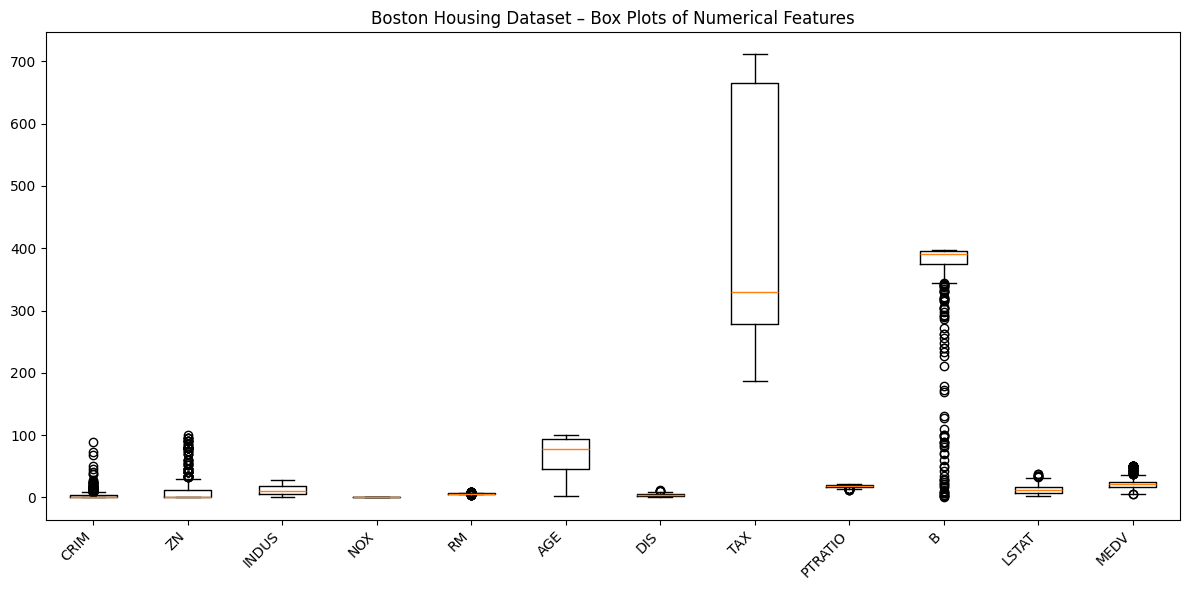

In [12]:
 # 載入必要的套件
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df.head(5)


# 只選擇數值型欄位
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# 畫出這些欄位的 boxplot
plt.figure(figsize=(max(12, len(numeric_cols) * 0.8), 6))
plt.boxplot(df[numeric_cols].values, tick_labels=numeric_cols, showfliers=True)

plt.xticks(rotation=45, ha="right")
plt.title("Boston Housing Dataset – Box Plots of Numerical Features")
plt.tight_layout()
plt.show()

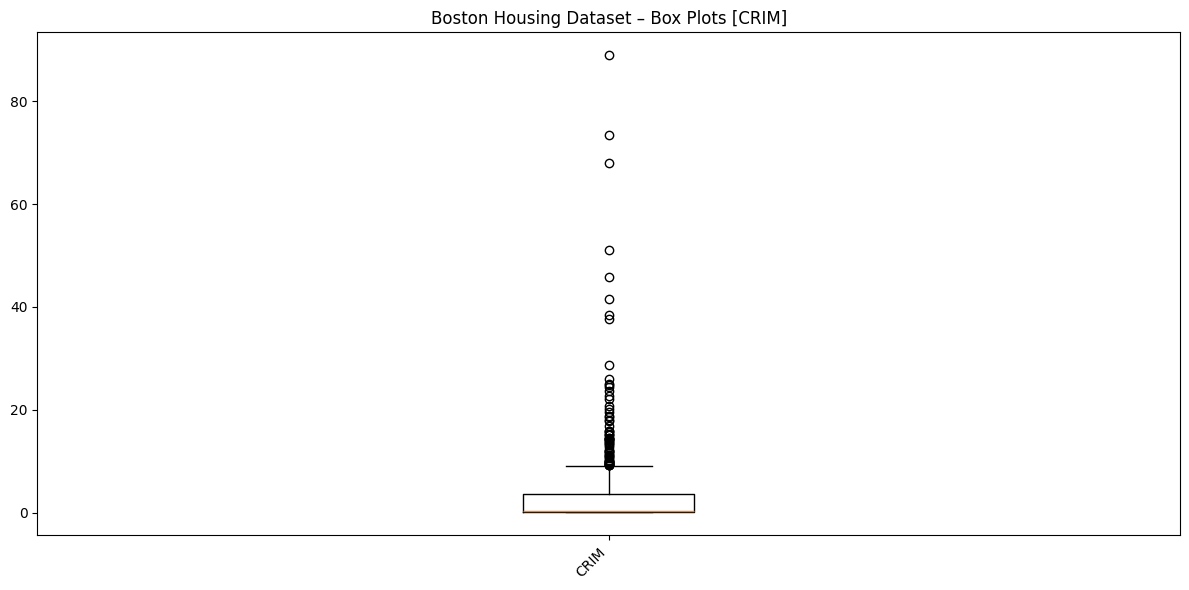

In [13]:
# 畫出這些欄位的 boxplot
# CRIM: 有非常多的點遠高於上界，表示有些地區的犯罪率極高。每人平均的城鎮犯罪率（per capita crime rate by town）
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
#df.head(5)
#print(df["CRIM"].values,"type:",type(df["CRIM"].values))
plt.figure(figsize=(max(12, len(numeric_cols) * 0.8), 6))
plt.boxplot(df["CRIM"].values, tick_labels=["CRIM"])

plt.xticks(rotation=45, ha="right")
plt.title("Boston Housing Dataset – Box Plots [CRIM]")
plt.tight_layout()
plt.show()


In [14]:
# 使用 IQR 方法偵測異常值 (以波士頓房價資料集的 'CRIM' 欄位為例)
# 首先使用 describe() 獲取四分位數
desc = df['CRIM'].describe()
Q1 = desc['25%']
Q3 = desc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound:",lower_bound,"upper_bound:",upper_bound)
# 找出異常值
outliers = df[(df['CRIM'] < lower_bound) | (df['CRIM'] > upper_bound)]

print("CRIM 欄位的異常值數量:", len(outliers))
print("outliers data：\n")
outliers

lower_bound: -5.31051125 upper_bound: 9.06963875
CRIM 欄位的異常值數量: 66
outliers data：



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
367,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666.0,20.2,131.42,13.33,23.1
371,9.2323,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
373,11.1081,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666.0,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0,0.671,7.313,97.9,1.3163,24,666.0,20.2,396.90,13.44,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,15.5757,0.0,18.1,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13,19.1
469,13.0751,0.0,18.1,0,0.580,5.713,56.7,2.8237,24,666.0,20.2,396.90,14.76,20.1
477,15.0234,0.0,18.1,0,0.614,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91,12.0
478,10.2330,0.0,18.1,0,0.614,6.185,96.7,2.1705,24,666.0,20.2,379.70,18.03,14.6


# 課堂練習：處理異常值(接續波士頓房價資料集)

1.   任務： 繼續使用波士頓房價資料集 (df)，偵測其他欄位（例如：'TAX' 或 'B'）的異常值。
2. 任務： 使用四分位距 (IQR) 方法，計算該欄位的異常值上下限。
3. 任務： 找出並列出該欄位中被判定為異常值的資料點數量


In [ ]:
# 任務 1 & 2
selected_column = 'TAX' # 或其他欄位
col_desc = df[selected_column].describe()
# Q1 = ...
# Q3 = ...
# IQR = ...
# lower_bound = ...
# upper_bound = ...
print(f"{selected_column} 欄位的 IQR 上限: {upper_bound}, 下限: {lower_bound}\n")

# 任務 3
# outliers = ...
print(f"{selected_column} 欄位的異常值數量: {len(outliers)}\n")
print("部分異常值資料點:\n", outliers.head())

TAX 欄位的 IQR 上限: 1246.5, 下限: -301.5

TAX 欄位的異常值數量: 0

部分異常值資料點:
 Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


# 課堂範例: 針對所有欄位計算異常值

In [15]:
# 載入必要的套件  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df["target"]=boston.target
print(df.columns)

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    col_name = col + "outlier"
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # 先全部設為 0（非離群值）
    df[col_name] = False

    # 再將離群值的位置更新為 1
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col_name] = True
df["out_sum"]=0
for col in df.select_dtypes(include=['boolean']).columns:
    if "outlier" in col:
        #print(df[col],"type",type(df[col]))
        df["out_sum"] = df["out_sum"] + df[col].astype(int)


df[df["out_sum"]==0]



Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'target'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RMoutlier,AGEoutlier,DISoutlier,TAXoutlier,PTRATIOoutlier,Boutlier,LSTAToutlier,MEDVoutlier,targetoutlier,out_sum
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,False,False,False,False,False,False,False,False,False,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,False,False,False,False,False,False,False,False,False,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,False,False,False,False,False,False,False,False,False,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,False,False,False,False,False,False,False,False,False,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,...,False,False,False,False,False,False,False,False,False,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,...,False,False,False,False,False,False,False,False,False,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,...,False,False,False,False,False,False,False,False,False,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,...,False,False,False,False,False,False,False,False,False,0


# 課堂範例: 偵測並移除重複資料

In [16]:
# 建立含重複資料的範例
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Bob', 'Alice', 'Eve'],
    'Score': [90, 85, 78, 85, 90, 95]
}
df = pd.DataFrame(data)

print("原始資料：")
print(df)

# 偵測重複資料
print("\n重複資料筆數：", df.duplicated().sum())
print("\n重複資料：")
print(df[df.duplicated()])

# 移除重複資料（保留第一次出現）
df_cleaned = df.drop_duplicates()
print("\n移除重複後的資料：")
print(df_cleaned)

原始資料：
      Name  Score
0    Alice     90
1      Bob     85
2  Charlie     78
3      Bob     85
4    Alice     90
5      Eve     95

重複資料筆數： 2

重複資料：
    Name  Score
3    Bob     85
4  Alice     90

移除重複後的資料：
      Name  Score
0    Alice     90
1      Bob     85
2  Charlie     78
5      Eve     95
